In [1]:
# Author: Dr James K Ruffle
# Email: j.ruffle@ucl.ac.uk

import pandas as pd
import numpy as np
from random_username.generate import generate_username
import random
import glob
import datetime
import names
from faker import Faker
from tqdm import tqdm
import os
import seaborn as sns
print(os.getcwd())

import warnings #suppress buggy pandas warning
warnings.filterwarnings("ignore")

/Users/jruffle/Library/CloudStorage/OneDrive-UniversityCollegeLondon/PhD/scripts_JKR/WellcomeHackathon/WIdeathonRetention23/code/simulated_data


In [2]:
sample_size = 150
timepoints = 500

max_points_per_epoch = 1150

In [3]:
def generate_random_date(start_year, end_year):
    start_date = datetime.date(start_year, 1, 1)
    end_date = datetime.date(end_year, 12, 31)

    days_between = (end_date - start_date).days
    random_days = random.randint(0, days_between)
    
    random_date = start_date + datetime.timedelta(days=random_days)
    return random_date

In [4]:
ethnic_groups = ['Asian or Asian British','Black, Black British, Caribbean or African',
                 'Mixed or multiple ethnic groups','White','Not disclosed']
# categories taken from https://www.ethnicity-facts-figures.service.gov.uk/style-guide/ethnic-groups

In [5]:
#HADS questionnaire data is based on
# https://www.svri.org/sites/default/files/attachments/2016-01-13/HADS.pdf

In [6]:
# prototypic treatment data is based on
# https://www.nice.org.uk

In [7]:
df = pd.DataFrame(generate_username(sample_size),columns=['username'])

df['icon']=''
icons = glob.glob('../../assets/icons/*png')

df['Trial name']='MindfulAI'

#constitutional data
df['First name']=''
df['Last name']=''
df['DOB']=''
df['Address']=''
df['Latitute']=0
df['Longitude']=0
df['Postcode']=''
df['Telephone number']=''
df['Sex']=''
df['Gender']=''
df['Ethnicity']=''
df['Weight']=''
df['Height']=''
df['Employment status']=''
df['Smoking status']=''
df['ETOH units per week']=''
df['Recreational drug use']=''

#Healthcare acess data
df['GP']=''
df['GP address']=''
df['GP postcode']=''
df['GP latitute']=''
df['GP longitude']=''
df['GP telephone number']=''
df['Hospital Consultant']=''
df['Hospital address']=''
df['Hospital postcode']=''
df['Hospital latitude']=0
df['Hospital longitude']=0
df['Hospital telephone number']=''

#Medical data
df['Diagnosis']=''
df['Duration of diagnosis']=0
df['Family History']=''
df['Under Community Mental Health Team']=''
df['Has had inpatient treatment']=''
df['Has had therapy']=''
df['On anxiolytic']=''
df['On anti-depressant']=''
df['On lithium']=''
df['On valproate']=''
df['Polypharmacy']=''
df['Physical disability']=''
df['Carers']=''

#start of gamification
df['Enrollment points']=1000

for i, row in tqdm(df.iterrows()):
    total_points=0
    total_attendance_points=0
    total_log_points=0
    total_check_in_points=0
    total_asked_question_points=0
    total_answered_question_points=0
    total_spoke_to_bot_points=0
    
    df.loc[i,'icon']=icons[random.randint(0, len(icons)-1)]
    
    df.loc[i,'DOB']=np.random.choice([generate_random_date(1970, 2005),'Not disclosed'], p=[0.9,0.1])
    df.loc[i,'Sex']=np.random.choice(['Male','Female','Not disclosed'],p=[0.45,0.45,0.1])
    df.loc[i,'Gender']=np.random.choice(['Male','Female','Non-binary','Not disclosed'],p=[0.35,0.35,0.2,0.1])
    
    if df.loc[i,'Gender']=='Male':
        df.loc[i,'First name']=names.get_first_name(gender='male')
    elif df.loc[i,'Gender']=='Female':
        df.loc[i,'First name']=names.get_first_name(gender='female')
    else:
        df.loc[i,'First name']=names.get_first_name()
    df.loc[i,'Last name']=names.get_last_name()
    
    df.loc[i,'Ethnicity']=np.random.choice(ethnic_groups)
    df.loc[i,'Weight']=np.random.choice([np.round(80*random.uniform(0.5, 2),1),'Not disclosed'], p=[0.9,0.1])
    df.loc[i,'Height']=np.random.choice([np.round(random.uniform(100, 200),1),'Not disclosed'], p=[0.9,0.1])
    df.loc[i,'Employment status']=np.random.choice(['Employed','Unemployed','Not disclosed'], p=[0.45,0.45,0.1])
    
    df.loc[i,'Smoking status']=np.random.choice(['Current smoker','Ex-smoker','Never smoked'])
    df.loc[i,'ETOH units per week']=int(random.uniform(0, 35))
    df.loc[i,'Recreational drug use']=np.random.choice(['Yes','No'])
    
    fake = Faker('en-UK')
    df.loc[i,'Address']=fake.address()
    df.loc[i,'Latitute']=fake.latitude()
    df.loc[i,'Longitude']=fake.longitude()
    df.loc[i,'Postcode']=fake.postcode()
    df.loc[i,'Telephone number']=fake.phone_number()
    
    fake = Faker('en-UK')
    df.loc[i,'GP']='Dr '+names.get_full_name()
    df.loc[i,'GP address']=fake.address()
    df.loc[i,'GP postcode']=fake.postcode()
    df.loc[i,'GP latitute']=fake.latitude()
    df.loc[i,'GP longitude']=fake.longitude()
    df.loc[i,'GP telephone number']=fake.phone_number()
    
    fake = Faker('en-UK')
    df.loc[i,'Hospital Consultant']='Dr '+names.get_full_name()
    df.loc[i,'Hospital address']=fake.address()
    df.loc[i,'Hospital postcode']=fake.postcode()
    df.loc[i,'Hospital latitude']=fake.latitude()
    df.loc[i,'Hospital longitude']=fake.longitude()
    df.loc[i,'Hospital telephone number']=fake.phone_number()
    
    df.loc[i,'Diagnosis']=np.random.choice(['Major depressive disorder','Bipolar depression','Generalized Anxiety Disorder'])
    if df.loc[i,'DOB']!='Not disclosed':
        df.loc[i,'Duration of diagnosis']=(datetime.date.today().year-df.loc[i,'DOB'].year)*random.uniform(0, 0.5)
    else:
        df.loc[i,'Duration of diagnosis']=random.uniform(0, 10)
    df.loc[i,'Family History']=np.random.choice(['Positive','Negative'])
    df.loc[i,'Under Community Mental Health Team']=np.random.choice(['Yes','No'])
    df.loc[i,'Has had inpatient treatment']=np.random.choice(['Yes','No'])
    df.loc[i,'Has had therapy']=np.random.choice(['Yes','No'])

    df.loc[i,'On anxiolytic']=np.random.choice(['Yes','No'])
    df.loc[i,'On anti-depressant']=np.random.choice(['Yes','No'])
    df.loc[i,'On lithium']=np.random.choice(['Yes','No'])
    df.loc[i,'On valproate']=np.random.choice(['Yes','No'])
    df.loc[i,'Polypharmacy']=np.random.choice(['Yes','No'])
    df.loc[i,'Physical disability']=np.random.choice(['Yes','No'])
    df.loc[i,'Carers']=np.random.choice(['Yes','No'])
    
    for timepoint in range(timepoints):
        #prime an initial value with probability as shown
        if timepoint==0:
            df.loc[i,'Attended last appointment points: timepoint '+str(timepoint)]=np.random.choice([0,1000], p=[0.5,0.5])
            df.loc[i,'Logged symptoms today points: timepoint '+str(timepoint)]=np.random.choice([0,50], p=[0.5,0.5])
            df.loc[i,'Checked in today points: timepoint '+str(timepoint)]=np.random.choice([0,10], p=[0.5,0.5])
            df.loc[i,'Asked a question points: timepoint '+str(timepoint)]=np.random.choice([0,20], p=[0.8,0.2])
            df.loc[i,'Answered a question points: timepoint '+str(timepoint)]=np.random.choice([0,50], p=[0.8,0.2])
            df.loc[i,'Spoke to trialbot points: timepoint '+str(timepoint)]=np.random.choice([0,20], p=[0.5,0.5])
            df.loc[i,'Epoch points: timepoint '+str(timepoint)]=df.loc[i,'Spoke to trialbot points: timepoint '+str(timepoint)]+df.loc[i,'Answered a question points: timepoint '+str(timepoint)]+df.loc[i,'Asked a question points: timepoint '+str(timepoint)]+df.loc[i,'Checked in today points: timepoint '+str(timepoint)]+df.loc[i,'Logged symptoms today points: timepoint '+str(timepoint)]+df.loc[i,'Attended last appointment points: timepoint '+str(timepoint)]
            
            total_attendance_points+=df.loc[i,'Attended last appointment points: timepoint '+str(timepoint)]
            total_log_points+=df.loc[i,'Logged symptoms today points: timepoint '+str(timepoint)]
            total_check_in_points+=df.loc[i,'Checked in today points: timepoint '+str(timepoint)]
            total_asked_question_points+=df.loc[i,'Asked a question points: timepoint '+str(timepoint)]
            total_answered_question_points+=df.loc[i,'Answered a question points: timepoint '+str(timepoint)]
            total_spoke_to_bot_points+=df.loc[i,'Spoke to trialbot points: timepoint '+str(timepoint)]
            total_points+=df.loc[i,'Epoch points: timepoint '+str(timepoint)]
            
            df.loc[i,'Cumulative points: timepoint '+str(timepoint)]=total_points
            df.loc[i,'Cumulative attendance points: timepoint '+str(timepoint)]=total_attendance_points
            df.loc[i,'Cumulative log points: timepoint '+str(timepoint)]=total_log_points
            df.loc[i,'Cumulative check in points: timepoint '+str(timepoint)]=total_check_in_points
            df.loc[i,'Cumulative answered question points: timepoint '+str(timepoint)]=total_asked_question_points
            df.loc[i,'Cumulative spoke to bot points: timepoint '+str(timepoint)]=total_spoke_to_bot_points

            #simulate randomly anxiety as a function of depression, and vice versa
            order = np.random.choice(['Anxiety','Depression'])
            if order == 'Anxiety':
                df.loc[i,'HADS-Anxiety: timepoint '+str(timepoint)]=random.randint(12, 21)
                df.loc[i,'HADS-Depression: timepoint '+str(timepoint)]=int(df.loc[i,'HADS-Anxiety: timepoint '+str(timepoint)]*random.uniform(0.2, 1))
            if order == 'Depression':
                df.loc[i,'HADS-Depression: timepoint '+str(timepoint)]=random.randint(12, 21)
                df.loc[i,'HADS-Anxiety: timepoint '+str(timepoint)]=int(df.loc[i,'HADS-Depression: timepoint '+str(timepoint)]*random.uniform(0.2, 1))
            
        #work to the hypothesis that prior values have SOME temporal relationship    
        if timepoint>0:      
            if df.loc[i,'Logged symptoms today points: timepoint '+str(timepoint-1)]==0:
#                 p0,p1 = 0.7,0.3
                p0=random.uniform(0.6, 1)
                p1=1-p0
            else:
#                 p0,p1 = 0.4,0.6    
                p1=random.uniform(0.6, 1)
                p0=1-p1
            df.loc[i,'Logged symptoms today points: timepoint '+str(timepoint)]=np.random.choice([0,50], p=[p0,p1])
            
            if df.loc[i,'Checked in today points: timepoint '+str(timepoint-1)]==0:
#                 p0,p1 = 0.6,0.4
                p0=random.uniform(0.6, 1)
                p1=1-p0
            else:
                p0,p1 = 0.4,0.6
                p1=random.uniform(0.6, 1)
                p0=1-p1
            df.loc[i,'Checked in today points: timepoint '+str(timepoint)]=np.random.choice([0,10], p=[p0,p1])
            
            if df.loc[i,'Asked a question points: timepoint '+str(timepoint-1)]==0:
#                 p0,p1 = 0.8,0.2
                p0=random.uniform(0.8, 1)
                p1=1-p0
            else:
#                 p0,p1 = 0.4,0.6
                p1=random.uniform(0.6, 1)
                p0=1-p1
            df.loc[i,'Asked a question points: timepoint '+str(timepoint)]=np.random.choice([0,20], p=[p0,p1])
            
            if df.loc[i,'Answered a question points: timepoint '+str(timepoint-1)]==0:
#                 p0,p1 = 0.8,0.2
                p0=random.uniform(0.8, 1)
                p1=1-p0
            else:
#                 p0,p1 = 0.4,0.6
                p1=random.uniform(0.6, 1)
                p0=1-p1
            df.loc[i,'Answered a question points: timepoint '+str(timepoint)]=np.random.choice([0,50], p=[p0,p1])
            
            if df.loc[i,'Spoke to trialbot points: timepoint '+str(timepoint-1)]==0:
#                 p0,p1 = 0.6,0.4
                p0=random.uniform(0.6, 1)
                p1=1-p0
            else:
#                 p0,p1 = 0.4,0.6
                p1=random.uniform(0.6, 1)
                p0=1-p1
            df.loc[i,'Spoke to trialbot points: timepoint '+str(timepoint)]=np.random.choice([0,20], p=[p0,p1])

            
            engagement = df.loc[i,'Epoch points: timepoint '+str(timepoint-1)]/max_points_per_epoch
            
            #multi-level engagement probabalistic attendence from app engagement
            if df.loc[i,'Attended last appointment points: timepoint '+str(timepoint-1)]>0 and engagement>0.9:
                p1=random.uniform(0.7, 1)
                p0=1-p1
            if df.loc[i,'Attended last appointment points: timepoint '+str(timepoint-1)]>0 and engagement>0.8:
                p1=random.uniform(0.6, 1)
                p0=1-p1
            if df.loc[i,'Attended last appointment points: timepoint '+str(timepoint-1)]>0 and engagement>0.7:
                p1=random.uniform(0.5, 1)
                p0=1-p1
            if df.loc[i,'Attended last appointment points: timepoint '+str(timepoint-1)]>0 and engagement>0.6:
                p1=random.uniform(0.4, 1)
                p0=1-p1
            if df.loc[i,'Attended last appointment points: timepoint '+str(timepoint-1)]>0 and engagement>0.5:
                p1=random.uniform(0.3, 1)
                p0=1-p1
            else:
                p0=random.uniform(0.75, 1)
                p1=1-p0

            df.loc[i,'Attended last appointment points: timepoint '+str(timepoint)]=np.random.choice([0,1000], p=[p0,p1])
        
            total_attendance_points+=df.loc[i,'Attended last appointment points: timepoint '+str(timepoint)]
            total_log_points+=df.loc[i,'Logged symptoms today points: timepoint '+str(timepoint)]
            total_check_in_points+=df.loc[i,'Checked in today points: timepoint '+str(timepoint)]
            total_asked_question_points+=df.loc[i,'Asked a question points: timepoint '+str(timepoint)]
            total_answered_question_points+=df.loc[i,'Answered a question points: timepoint '+str(timepoint)]
            total_spoke_to_bot_points+=df.loc[i,'Spoke to trialbot points: timepoint '+str(timepoint)]
            
            df.loc[i,'Cumulative points: timepoint '+str(timepoint)]=total_points
            df.loc[i,'Cumulative attendance points: timepoint '+str(timepoint)]=total_attendance_points
            df.loc[i,'Cumulative log points: timepoint '+str(timepoint)]=total_log_points
            df.loc[i,'Cumulative check in points: timepoint '+str(timepoint)]=total_check_in_points
            df.loc[i,'Cumulative answered question points: timepoint '+str(timepoint)]=total_asked_question_points
            df.loc[i,'Cumulative spoke to bot points: timepoint '+str(timepoint)]=total_spoke_to_bot_points
            df.loc[i,'Epoch points: timepoint '+str(timepoint)]=df.loc[i,'Spoke to trialbot points: timepoint '+str(timepoint)]+df.loc[i,'Answered a question points: timepoint '+str(timepoint)]+df.loc[i,'Asked a question points: timepoint '+str(timepoint)]+df.loc[i,'Checked in today points: timepoint '+str(timepoint)]+df.loc[i,'Logged symptoms today points: timepoint '+str(timepoint)]+df.loc[i,'Attended last appointment points: timepoint '+str(timepoint)]
            total_points+=df.loc[i,'Epoch points: timepoint '+str(timepoint)]
            
            df.loc[i,'HADS-Anxiety: timepoint '+str(timepoint)]=int((df.loc[i,'HADS-Anxiety: timepoint '+str(timepoint-1)]-engagement)*random.uniform(0.95, 1.2))
            df.loc[i,'HADS-Depression: timepoint '+str(timepoint)]=int((df.loc[i,'HADS-Depression: timepoint '+str(timepoint-1)]-engagement)*random.uniform(0.95, 1.2))
    
            if df.loc[i,'HADS-Anxiety: timepoint '+str(timepoint)]>21:
                df.loc[i,'HADS-Anxiety: timepoint '+str(timepoint)]=21
            if df.loc[i,'HADS-Depression: timepoint '+str(timepoint)]>21:
                df.loc[i,'HADS-Depression: timepoint '+str(timepoint)]=21
            if df.loc[i,'HADS-Anxiety: timepoint '+str(timepoint)]<0:
                df.loc[i,'HADS-Anxiety: timepoint '+str(timepoint)]=0
            if df.loc[i,'HADS-Depression: timepoint '+str(timepoint)]<0:
                df.loc[i,'HADS-Depression: timepoint '+str(timepoint)]=0
                
        #simulate personal health rating as a function of perfect health MINUS anxiety and depression, plus a metric of app engagement, multipled a random variable of life event
        engagement = df.loc[i,'Epoch points: timepoint '+str(timepoint)]/max_points_per_epoch
        enagement_weight=15*engagement
        df.loc[i,'Personal health rating: timepoint '+str(timepoint)]=int((100-(df.loc[i,'HADS-Depression: timepoint '+str(timepoint)]+df.loc[i,'HADS-Anxiety: timepoint '+str(timepoint)])+enagement_weight)*random.uniform(0.7, 1.1))
        if df.loc[i,'Personal health rating: timepoint '+str(timepoint)]>100:
            df.loc[i,'Personal health rating: timepoint '+str(timepoint)]=100
    
    df.loc[i,'Total points']=total_points
    df.loc[i,'Total attendance points']=total_attendance_points
    df.loc[i,'Total log points']=total_log_points
    df.loc[i,'Total check in points']=total_check_in_points
    df.loc[i,'Total answered question points']=total_asked_question_points
    df.loc[i,'Total spoke to bot points']=total_spoke_to_bot_points
        
print(df.shape)
df.head()

150it [01:04,  2.34it/s]

(150, 8052)


,username,icon,Trial name,First name,Last name,DOB,Address,Latitute,Longitude,Postcode,...,Epoch points: timepoint 499,HADS-Anxiety: timepoint 499,HADS-Depression: timepoint 499,Personal health rating: timepoint 499,Total points,Total attendance points,Total log points,Total check in points,Total answered question points,Total spoke to bot points
0,excitedEggs9,../../assets/icons/penguin_6267086.png,MindfulAI,Bonnie,Lapalme,1984-06-02,89 Harris tunnel\nEast Nicola\nMK9X 6NU,-32.1404715,-173.581318,WF6 3AH,...,1050.0,0.0,0.0,99.0,163510.0,130000.0,12400.0,2140.0,3000.0,4520.0
1,gloomyChough7,../../assets/icons/snake_1067840.png,MindfulAI,Donald,Nelson,1982-04-07,Studio 5\nJordan cove\nOwenshire\nW96 8PP,17.673140,-6.882827,ZE3E 4PJ,...,1100.0,0.0,18.0,72.0,193830.0,165000.0,10850.0,2640.0,2440.0,4800.0
2,ashamedGelding7,../../assets/icons/walrus_9308957.png,MindfulAI,Kenneth,Turner,1986-12-09,Studio 24\nJulian fields\nEast Julie\nRG92 7FZ,-17.966391,76.832105,G5 0UG,...,1010.0,0.0,0.0,100.0,212260.0,179000.0,13200.0,2650.0,3100.0,4760.0
3,humorousEland6,../../assets/icons/monkey_1998721.png,MindfulAI,Robert,Ortiz,1993-06-30,Studio 99\nNixon locks\nPort Charlesville\nM6 4XD,41.682658,-125.328700,S6F 5PQ,...,1140.0,0.0,0.0,94.0,171360.0,140000.0,14550.0,2800.0,2640.0,3820.0
4,sugaryOryx1,../../assets/icons/lion_2298426.png,MindfulAI,Lorraine,Torres,1973-11-27,Studio 32w\nRogers street\nHarveyfurt\nS9 1QH,-42.644311,-23.397303,NE64 8AA,...,150.0,0.0,13.0,90.0,191680.0,160000.0,13050.0,2760.0,3480.0,5040.0


In [8]:
#simulate award badges for users
#similar to git achievements
badges = glob.glob('../../assets/badges/*png')

for i, row in df.iterrows():
    for b in range(len(badges)):
        png = badges[b]
        award = badges[b].split('/')[-1].split('.')[0].replace("_", " ").title()
        
        #random allocation of if award or not
        achievement_unlocked = np.random.choice([0,1], p=[0.7,0.3])
        if achievement_unlocked ==1:
            df.loc[i,award]=png
        else:
            df.loc[i,award]=''

In [9]:
print("Example temporal health rating over time of users")
df_melt = pd.melt(df,id_vars='username')
df_melt = df_melt[df_melt['variable'].str.contains('Cumulative points')]
df_melt

Example temporal health rating over time of users


,username,variable,value
7800,excitedEggs9,Cumulative points: timepoint 0,1050.0
7801,gloomyChough7,Cumulative points: timepoint 0,30.0
7802,ashamedGelding7,Cumulative points: timepoint 0,1060.0
7803,humorousEland6,Cumulative points: timepoint 0,20.0
7804,sugaryOryx1,Cumulative points: timepoint 0,1120.0
...,...,...,...
1205395,importedTuna0,Cumulative points: timepoint 499,159760.0
1205396,guiltyDove3,Cumulative points: timepoint 499,167460.0
1205397,artisticCheese3,Cumulative points: timepoint 499,182460.0
1205398,wakefulGarlic5,Cumulative points: timepoint 499,165620.0


<Axes: xlabel='variable', ylabel='value'>

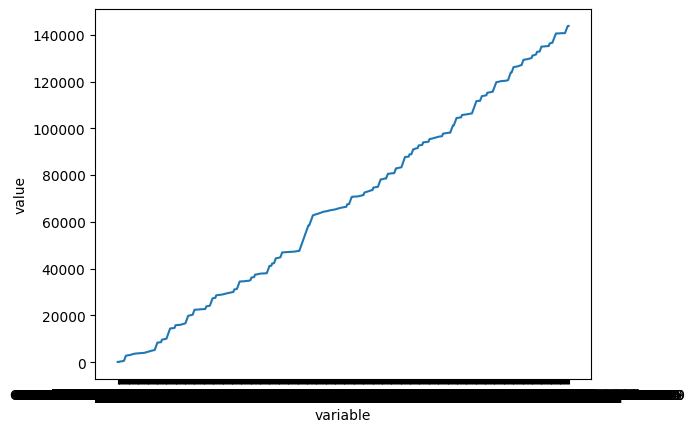

In [10]:
sns.lineplot(data=df_melt[df_melt['username']==np.unique(df_melt['username'])[0]],x='variable',y='value')

<Axes: xlabel='variable', ylabel='value'>

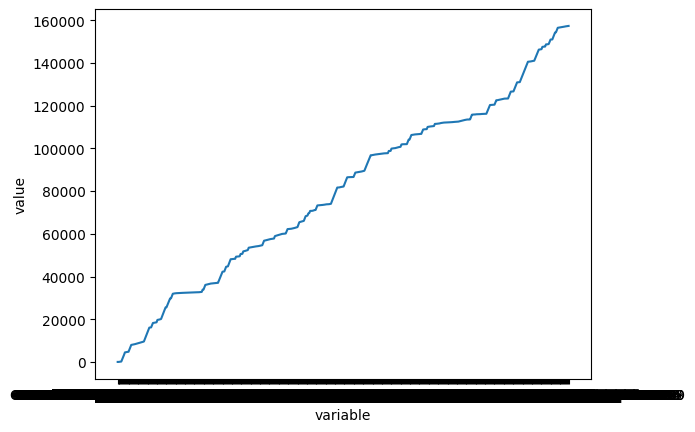

In [11]:
sns.lineplot(data=df_melt[df_melt['username']==np.unique(df_melt['username'])[1]],x='variable',y='value')

<Axes: xlabel='variable', ylabel='value'>

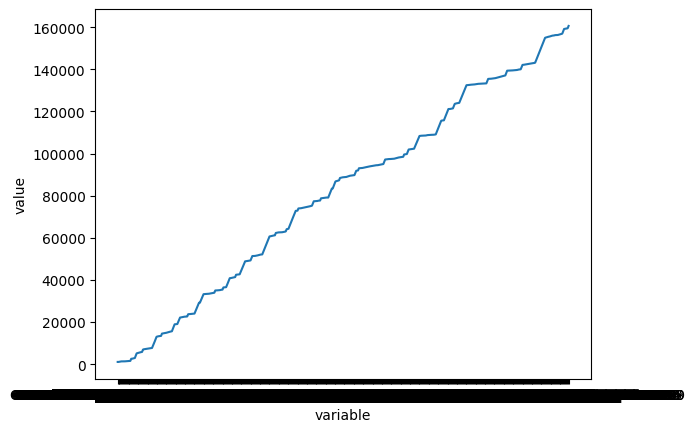

In [12]:
sns.lineplot(data=df_melt[df_melt['username']==np.unique(df_melt['username'])[2]],x='variable',y='value')

<Axes: xlabel='variable', ylabel='value'>

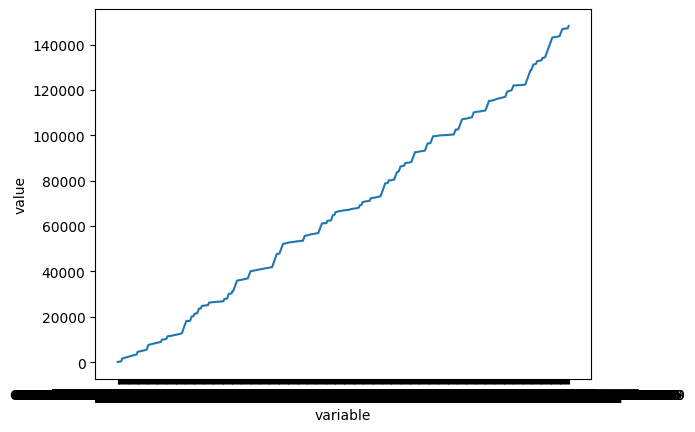

In [13]:
sns.lineplot(data=df_melt[df_melt['username']==np.unique(df_melt['username'])[3]],x='variable',y='value')

<Axes: xlabel='variable', ylabel='value'>

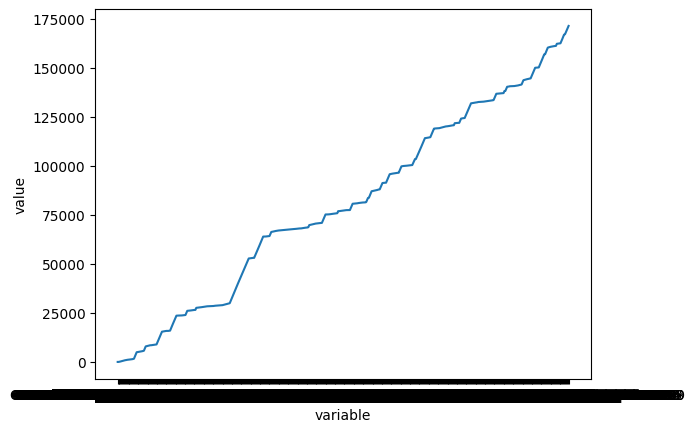

In [14]:
sns.lineplot(data=df_melt[df_melt['username']==np.unique(df_melt['username'])[4]],x='variable',y='value')

In [15]:
df.to_csv('simulated_data.csv')